In [1]:
import pandas as pd
df1 = pd.read_csv(r"D:\临床数据\NHANES数据清洗\3年心因死亡数据.csv", low_memory=False)
selected_columns = [
    "SEQN","Doctor told you have diabetes", "Education Level - Adults 20+", "Ever told you had a stroke",
    "Ever told you had coronary heart disease", "Ever told you had high blood pressure",
    "Had at least 12 alcohol drinks/1 yr?", "Marital Status", "Moderate recreational activities",
    "Moderate work activity", "Race", "Smoked at least 100 cigarettes in life", 
    "Vigorous recreational activities", "Vigorous work activity", "Walk or bicycle", "Age", 
    "Minutes sedentary activity", "Ratio of family income to poverty", "Waist Circumference (cm)", 
    "Alanine Aminotransferase (ALT) (U/L)", "Albumin (g/L)", "Albumin_urine (mg/L)", 
    "Alkaline Phosphatase (ALP) (IU/L)", "Bicarbonate (mmol/L)", "Blood urea nitrogen (mmol/L)", 
    "Chloride (mmol/L)", "Cholesterol (mmol/L)", "Creatinine (?mol/L)", "Creatinine_urine (umol/L)", 
    "Direct HDL-Cholesterol (mmol/L)", "Gamma Glutamyl Transferase (GGT) (U/L)", "Globulin (g/L)", 
    "Glucose_serum (mmol/L)", "Glycohemoglobin (%)", "Hematocrit (%)", "Hemoglobin (g/dL)", 
    "Iron_refigerated (umol/L)", "Lactate Dehydrogenase (LDH) (U/L)", "Lymphocyte number (1000 cells/uL)", 
    "Lymphocyte percent (%)", "Mean cell hemoglobin (pg)", "Mean cell hemoglobin concentration (g/dL)", 
    "Mean cell volume (fL)", "Monocyte number (1000 cells/uL)", "Monocyte percent (%)", 
    "Osmolality (mmol/Kg)", "Phosphorus (mmol/L)", "Platelet count (1000 cells/uL)", 
    "Potassium (mmol/L)", "Red blood cell count (million cells/uL)", "Red cell distribution width (%)", 
    "Segmented neutrophils num (1000 cell/uL)", "Segmented neutrophils percent (%)", 
    "Total protein (g/L)", "Uric acid (umol/L)", "3 year heart death"
]
df2 = df1[selected_columns]
from sklearn.preprocessing import StandardScaler
first_col = df2.iloc[:, 0]
last_col = df2.iloc[:, -1]
for col in df2.columns[1:15]:
    df2[col] = df2[col].astype('category')
df_encoded = pd.get_dummies(df2.iloc[:, 1:15], drop_first=True)
df_encoded = df_encoded.astype(int)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df2.iloc[:, 15:-1]), columns=df2.columns[15:-1])
df3 = pd.concat([first_col, df_encoded, df_standardized, last_col], axis=1)
x = df3.iloc[:, 1:66]
y = df3['3 year heart death']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
import joblib
estimator = joblib.load('LR-生活方式+检验学指标-3年心因死亡.joblib')
import shap
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
params = plt.rcParams
font_family = params['font.family']
font_name = params['font.sans-serif'][0]
print("当前字体设置：")
print("字体系列：", font_family)
print("字体名称：", font_name)
shap.initjs()
explainer = shap.LinearExplainer(estimator, x_train)
shap_values = explainer.shap_values(x_test)

C:\Users\wzc\AppData\Local\Temp\ipykernel_20200\2061622664.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].astype('category')


当前字体设置：
字体系列： ['Arial']
字体名称： DejaVu Sans


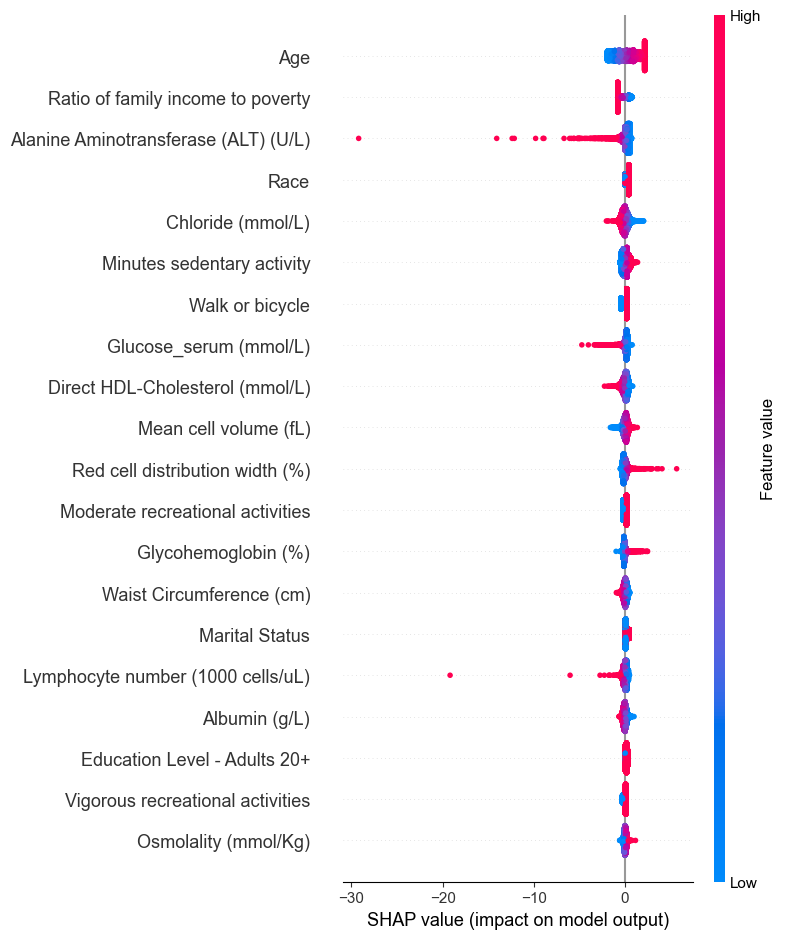

In [6]:
import numpy as np
feature_group = {
    "Doctor told you have diabetes": ["Doctor told you have diabetes_2", "Doctor told you have diabetes_3"],
    "Education Level - Adults 20+": ["Education Level - Adults 20+_2", "Education Level - Adults 20+_3", "Education Level - Adults 20+_4", "Education Level - Adults 20+_5"],
    "Ever told you had a stroke": ["Ever told you had a stroke_2"],
    "Ever told you had coronary heart disease": ["Ever told you had coronary heart disease_2"],
    "Ever told you had high blood pressure": ["Ever told you had high blood pressure_2"],
    "Had at least 12 alcohol drinks/1 yr?": ["Had at least 12 alcohol drinks/1 yr?_2"],
    "Marital Status": ["Marital Status_2", "Marital Status_3", "Marital Status_4", "Marital Status_5", "Marital Status_6"],
    "Moderate recreational activities": ["Moderate recreational activities_2"],
    "Moderate work activity": ["Moderate work activity_2"],
    "Race": ["Race_2", "Race_3", "Race_4", "Race_5"],
    "Smoked at least 100 cigarettes in life": ["Smoked at least 100 cigarettes in life_2"],
    "Vigorous recreational activities": ["Vigorous recreational activities_2"],
    "Vigorous work activity": ["Vigorous work activity_2"],
    "Walk or bicycle": ["Walk or bicycle_2"],
    "Age": ["Age"], 
    "Minutes sedentary activity": ["Minutes sedentary activity"], 
    "Ratio of family income to poverty": ["Ratio of family income to poverty"],
    "Waist Circumference (cm)": ["Waist Circumference (cm)"],
    "Alanine Aminotransferase (ALT) (U/L)": ["Alanine Aminotransferase (ALT) (U/L)"],
    "Albumin (g/L)": ["Albumin (g/L)"],
    "Albumin_urine (mg/L)": ["Albumin_urine (mg/L)"], 
    "Alkaline Phosphatase (ALP) (IU/L)": ["Alkaline Phosphatase (ALP) (IU/L)"],
    "Bicarbonate (mmol/L)": ["Bicarbonate (mmol/L)"],
    "Blood urea nitrogen (mmol/L)": ["Blood urea nitrogen (mmol/L)"],
    "Chloride (mmol/L)": ["Chloride (mmol/L)"],
    "Cholesterol (mmol/L)": ["Cholesterol (mmol/L)"],
    "Creatinine (umol/L)": ["Creatinine (?mol/L)"],
    "Creatinine_urine (umol/L)": ["Creatinine_urine (umol/L)"],
    "Direct HDL-Cholesterol (mmol/L)": ["Direct HDL-Cholesterol (mmol/L)"],
    "Gamma Glutamyl Transferase (GGT) (U/L)": ["Gamma Glutamyl Transferase (GGT) (U/L)"],
    "Globulin (g/L)": ["Globulin (g/L)"],
    "Glucose_serum (mmol/L)": ["Glucose_serum (mmol/L)"],
    "Glycohemoglobin (%)": ["Glycohemoglobin (%)"],
    "Hematocrit (%)": ["Hematocrit (%)"],
    "Hemoglobin (g/dL)": ["Hemoglobin (g/dL)"],
    "Iron_refigerated (umol/L)": ["Iron_refigerated (umol/L)"],
    "Lactate Dehydrogenase (LDH) (U/L)": ["Lactate Dehydrogenase (LDH) (U/L)"],
    "Lymphocyte number (1000 cells/uL)": ["Lymphocyte number (1000 cells/uL)"],
    "Lymphocyte percent (%)": ["Lymphocyte percent (%)"],
    "Mean cell hemoglobin (pg)": ["Mean cell hemoglobin (pg)"],
    "Mean cell hemoglobin concentration (g/dL)": ["Mean cell hemoglobin concentration (g/dL)"],
    "Mean cell volume (fL)": ["Mean cell volume (fL)"],
    "Monocyte number (1000 cells/uL)": ["Monocyte number (1000 cells/uL)"],
    "Monocyte percent (%)": ["Monocyte percent (%)"],
    "Osmolality (mmol/Kg)": ["Osmolality (mmol/Kg)"],
    "Phosphorus (mmol/L)": ["Phosphorus (mmol/L)"],
    "Platelet count (1000 cells/uL)": ["Platelet count (1000 cells/uL)"],
    "Potassium (mmol/L)": ["Potassium (mmol/L)"],
    "Red blood cell count (million cells/uL)": ["Red blood cell count (million cells/uL)"],
    "Red cell distribution width (%)": ["Red cell distribution width (%)"],
    "Segmented neutrophils num (1000 cell/uL)": ["Segmented neutrophils num (1000 cell/uL)"],
    "Segmented neutrophils percent (%)": ["Segmented neutrophils percent (%)"],
    "Total protein (g/L)": ["Total protein (g/L)"],
    "Uric acid (umol/L)": ["Uric acid (umol/L)"]
}
aggregated_features = pd.DataFrame(index=x_test.index)
for new_feature_name, original_columns in feature_group.items():
    existing_columns = [col for col in original_columns if col in x_test.columns]
    if existing_columns:
        aggregated_features[new_feature_name] = x_test[existing_columns].max(axis=1)
    else:
        print(f"Warning: None of the columns in {original_columns} were found in x_test")
num_samples = shap_values.shape[0]
aggregated_shap_values = np.zeros((num_samples, len(feature_group)))
for i, (new_feature_name, original_columns) in enumerate(feature_group.items()):
    group_indices = [x_test.columns.get_loc(col) for col in original_columns if col in x_test.columns]
    if group_indices:
        aggregated_shap_values[:, i] = np.max(shap_values[:, group_indices], axis=1)
feature_names = list(feature_group.keys())
fig1 = plt.figure()
shap.summary_plot(aggregated_shap_values, features=aggregated_features, feature_names=feature_names)

In [7]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('LR-SHAP图-3年心因死亡.pdf') as pdf:
    pdf.savefig(fig1)
    plt.close()

In [8]:
shap_values_mean_abs = np.mean(np.abs(aggregated_shap_values), axis=0)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': shap_values_mean_abs
})
features = feature_importance.sort_values(by='Importance', ascending=False)
print("All features based on SHAP values:")
print(features)

All features based on SHAP values:
                                      Feature  Importance
14                                        Age    1.017777
16          Ratio of family income to poverty    0.413370
18       Alanine Aminotransferase (ALT) (U/L)    0.376236
9                                        Race    0.299037
24                          Chloride (mmol/L)    0.273017
15                 Minutes sedentary activity    0.267589
13                            Walk or bicycle    0.257903
31                     Glucose_serum (mmol/L)    0.230486
28            Direct HDL-Cholesterol (mmol/L)    0.224446
41                      Mean cell volume (fL)    0.216564
49            Red cell distribution width (%)    0.198809
7            Moderate recreational activities    0.188693
32                        Glycohemoglobin (%)    0.166697
17                   Waist Circumference (cm)    0.156091
6                              Marital Status    0.155495
37          Lymphocyte number (1000 c

In [62]:
features.to_excel("LR-SHAP值-3年心因死亡.xlsx", index=False)

In [13]:
import pandas as pd
df1 = pd.read_csv(r"D:\临床数据\NHANES数据清洗\3年心因死亡数据.csv", low_memory=False)
selected_columns = [
    "SEQN","Doctor told you have diabetes", "Education Level - Adults 20+", "Ever told you had a stroke",
    "Ever told you had coronary heart disease", "Ever told you had high blood pressure",
    "Had at least 12 alcohol drinks/1 yr?", "Marital Status", "Moderate recreational activities",
    "Moderate work activity", "Race", "Smoked at least 100 cigarettes in life", 
    "Vigorous recreational activities", "Vigorous work activity", "Walk or bicycle", "Age", 
    "Minutes sedentary activity", "Ratio of family income to poverty", "Waist Circumference (cm)", 
    "Alanine Aminotransferase (ALT) (U/L)", "Albumin (g/L)", "Albumin_urine (mg/L)", 
    "Alkaline Phosphatase (ALP) (IU/L)", "Bicarbonate (mmol/L)", "Blood urea nitrogen (mmol/L)", 
    "Chloride (mmol/L)", "Cholesterol (mmol/L)", "Creatinine (?mol/L)", "Creatinine_urine (umol/L)", 
    "Direct HDL-Cholesterol (mmol/L)", "Gamma Glutamyl Transferase (GGT) (U/L)", "Globulin (g/L)", 
    "Glucose_serum (mmol/L)", "Glycohemoglobin (%)", "Hematocrit (%)", "Hemoglobin (g/dL)", 
    "Iron_refigerated (umol/L)", "Lactate Dehydrogenase (LDH) (U/L)", "Lymphocyte number (1000 cells/uL)", 
    "Lymphocyte percent (%)", "Mean cell hemoglobin (pg)", "Mean cell hemoglobin concentration (g/dL)", 
    "Mean cell volume (fL)", "Monocyte number (1000 cells/uL)", "Monocyte percent (%)", 
    "Osmolality (mmol/Kg)", "Phosphorus (mmol/L)", "Platelet count (1000 cells/uL)", 
    "Potassium (mmol/L)", "Red blood cell count (million cells/uL)", "Red cell distribution width (%)", 
    "Segmented neutrophils num (1000 cell/uL)", "Segmented neutrophils percent (%)", 
    "Total protein (g/L)", "Uric acid (umol/L)", "3 year heart death"
]
df2 = df1[selected_columns]
from sklearn.preprocessing import StandardScaler
first_col = df2.iloc[:, 0]
last_col = df2.iloc[:, -1]
for col in df2.columns[1:15]:
    df2[col] = df2[col].astype('category')
df_encoded = pd.get_dummies(df2.iloc[:, 1:15], drop_first=True)
df_encoded = df_encoded.astype(int)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df2.iloc[:, 15:-1]), columns=df2.columns[15:-1])
df3 = pd.concat([first_col, df_encoded, df_standardized, last_col], axis=1)
x = df3.iloc[:, 1:66]
y = df3['3 year heart death']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
import joblib
estimator = joblib.load('RF-生活方式+检验学指标-3年心因死亡.joblib')
import shap
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
params = plt.rcParams
font_family = params['font.family']
font_name = params['font.sans-serif'][0]
print("当前字体设置：")
print("字体系列：", font_family)
print("字体名称：", font_name)
shap.initjs()
explainer = shap.Explainer(estimator)
shap_values = explainer.shap_values(x_test)

当前字体设置：
字体系列： ['Arial']
字体名称： DejaVu Sans



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


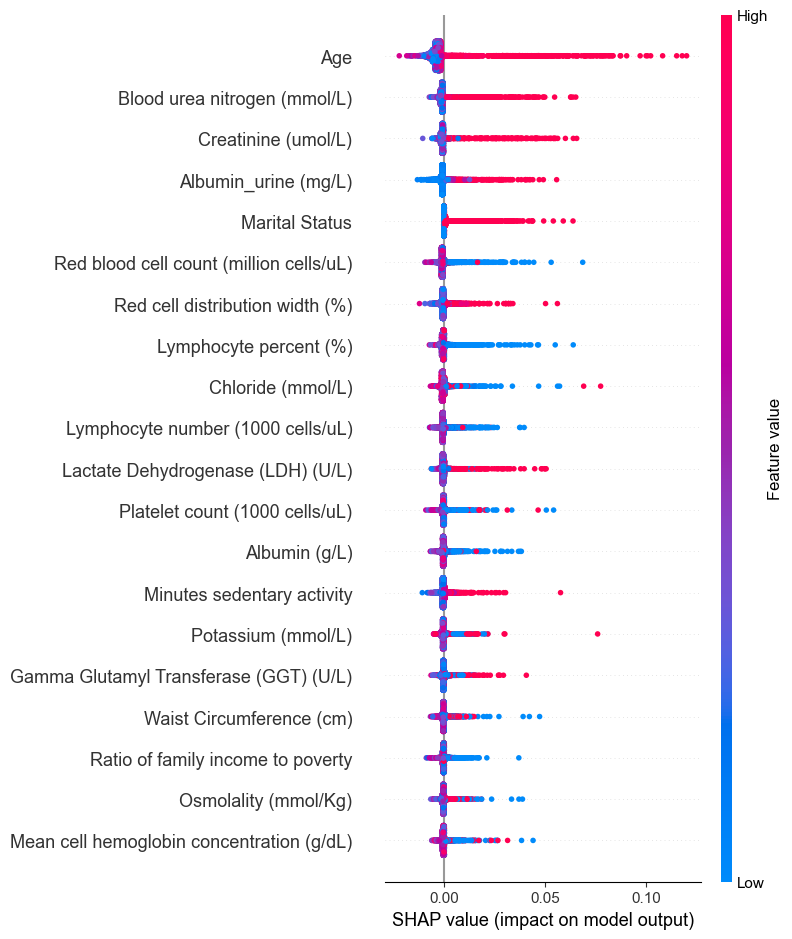

In [16]:
feature_group = {
    "Doctor told you have diabetes": ["Doctor told you have diabetes_2", "Doctor told you have diabetes_3"],
    "Education Level - Adults 20+": ["Education Level - Adults 20+_2", "Education Level - Adults 20+_3", "Education Level - Adults 20+_4", "Education Level - Adults 20+_5"],
    "Ever told you had a stroke": ["Ever told you had a stroke_2"],
    "Ever told you had coronary heart disease": ["Ever told you had coronary heart disease_2"],
    "Ever told you had high blood pressure": ["Ever told you had high blood pressure_2"],
    "Had at least 12 alcohol drinks/1 yr?": ["Had at least 12 alcohol drinks/1 yr?_2"],
    "Marital Status": ["Marital Status_2", "Marital Status_3", "Marital Status_4", "Marital Status_5", "Marital Status_6"],
    "Moderate recreational activities": ["Moderate recreational activities_2"],
    "Moderate work activity": ["Moderate work activity_2"],
    "Race": ["Race_2", "Race_3", "Race_4", "Race_5"],
    "Smoked at least 100 cigarettes in life": ["Smoked at least 100 cigarettes in life_2"],
    "Vigorous recreational activities": ["Vigorous recreational activities_2"],
    "Vigorous work activity": ["Vigorous work activity_2"],
    "Walk or bicycle": ["Walk or bicycle_2"],
    "Age": ["Age"], 
    "Minutes sedentary activity": ["Minutes sedentary activity"], 
    "Ratio of family income to poverty": ["Ratio of family income to poverty"],
    "Waist Circumference (cm)": ["Waist Circumference (cm)"],
    "Alanine Aminotransferase (ALT) (U/L)": ["Alanine Aminotransferase (ALT) (U/L)"],
    "Albumin (g/L)": ["Albumin (g/L)"],
    "Albumin_urine (mg/L)": ["Albumin_urine (mg/L)"], 
    "Alkaline Phosphatase (ALP) (IU/L)": ["Alkaline Phosphatase (ALP) (IU/L)"],
    "Bicarbonate (mmol/L)": ["Bicarbonate (mmol/L)"],
    "Blood urea nitrogen (mmol/L)": ["Blood urea nitrogen (mmol/L)"],
    "Chloride (mmol/L)": ["Chloride (mmol/L)"],
    "Cholesterol (mmol/L)": ["Cholesterol (mmol/L)"],
    "Creatinine (umol/L)": ["Creatinine (?mol/L)"],
    "Creatinine_urine (umol/L)": ["Creatinine_urine (umol/L)"],
    "Direct HDL-Cholesterol (mmol/L)": ["Direct HDL-Cholesterol (mmol/L)"],
    "Gamma Glutamyl Transferase (GGT) (U/L)": ["Gamma Glutamyl Transferase (GGT) (U/L)"],
    "Globulin (g/L)": ["Globulin (g/L)"],
    "Glucose_serum (mmol/L)": ["Glucose_serum (mmol/L)"],
    "Glycohemoglobin (%)": ["Glycohemoglobin (%)"],
    "Hematocrit (%)": ["Hematocrit (%)"],
    "Hemoglobin (g/dL)": ["Hemoglobin (g/dL)"],
    "Iron_refigerated (umol/L)": ["Iron_refigerated (umol/L)"],
    "Lactate Dehydrogenase (LDH) (U/L)": ["Lactate Dehydrogenase (LDH) (U/L)"],
    "Lymphocyte number (1000 cells/uL)": ["Lymphocyte number (1000 cells/uL)"],
    "Lymphocyte percent (%)": ["Lymphocyte percent (%)"],
    "Mean cell hemoglobin (pg)": ["Mean cell hemoglobin (pg)"],
    "Mean cell hemoglobin concentration (g/dL)": ["Mean cell hemoglobin concentration (g/dL)"],
    "Mean cell volume (fL)": ["Mean cell volume (fL)"],
    "Monocyte number (1000 cells/uL)": ["Monocyte number (1000 cells/uL)"],
    "Monocyte percent (%)": ["Monocyte percent (%)"],
    "Osmolality (mmol/Kg)": ["Osmolality (mmol/Kg)"],
    "Phosphorus (mmol/L)": ["Phosphorus (mmol/L)"],
    "Platelet count (1000 cells/uL)": ["Platelet count (1000 cells/uL)"],
    "Potassium (mmol/L)": ["Potassium (mmol/L)"],
    "Red blood cell count (million cells/uL)": ["Red blood cell count (million cells/uL)"],
    "Red cell distribution width (%)": ["Red cell distribution width (%)"],
    "Segmented neutrophils num (1000 cell/uL)": ["Segmented neutrophils num (1000 cell/uL)"],
    "Segmented neutrophils percent (%)": ["Segmented neutrophils percent (%)"],
    "Total protein (g/L)": ["Total protein (g/L)"],
    "Uric acid (umol/L)": ["Uric acid (umol/L)"]
}
aggregated_features = pd.DataFrame(index=x_test.index, columns=feature_names)
for new_feature_name, original_columns in feature_group.items():
    existing_columns = [col for col in original_columns if col in x_test.columns]
    if existing_columns:
        aggregated_features[new_feature_name] = x_test[existing_columns].max(axis=1)
aggregated_shap_values = np.zeros((num_samples, len(feature_names)))
for i, (new_feature_name, original_columns) in enumerate(feature_group.items()):
    group_indices = [x_test.columns.get_loc(col) for col in original_columns if col in x_test.columns]
    if group_indices:
        aggregated_shap_values[:, i] = np.max(shap_values_matrix[:, group_indices], axis=1)
fig1 = plt.figure()
shap.summary_plot(aggregated_shap_values, features=aggregated_features, feature_names=feature_names)

In [17]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('RF-SHAP图-3年心因死亡.pdf') as pdf:
    pdf.savefig(fig1)
    plt.close()

In [18]:
shap_values_mean_abs = np.mean(np.abs(aggregated_shap_values), axis=0)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': shap_values_mean_abs
})
features = feature_importance.sort_values(by='Importance', ascending=False)
print("All features based on SHAP values:")
print(features)

All features based on SHAP values:
                                      Feature  Importance
14                                        Age    0.006216
23               Blood urea nitrogen (mmol/L)    0.001872
26                        Creatinine (umol/L)    0.001709
20                       Albumin_urine (mg/L)    0.001698
6                              Marital Status    0.001317
48    Red blood cell count (million cells/uL)    0.001234
49            Red cell distribution width (%)    0.001079
38                     Lymphocyte percent (%)    0.000972
24                          Chloride (mmol/L)    0.000962
37          Lymphocyte number (1000 cells/uL)    0.000910
36          Lactate Dehydrogenase (LDH) (U/L)    0.000805
46             Platelet count (1000 cells/uL)    0.000755
19                              Albumin (g/L)    0.000733
15                 Minutes sedentary activity    0.000723
47                         Potassium (mmol/L)    0.000720
29     Gamma Glutamyl Transferase (GG

In [19]:
features.to_excel("RF-SHAP值-3年心因死亡.xlsx", index=False)

In [1]:
import numpy as np

In [25]:
import pandas as pd
df1 = pd.read_csv(r"D:\临床数据\NHANES数据清洗\3年心因死亡数据.csv", low_memory=False)
selected_columns = [
    "SEQN","Doctor told you have diabetes", "Education Level - Adults 20+", "Ever told you had a stroke",
    "Ever told you had coronary heart disease", "Ever told you had high blood pressure",
    "Had at least 12 alcohol drinks/1 yr?", "Marital Status", "Moderate recreational activities",
    "Moderate work activity", "Race", "Smoked at least 100 cigarettes in life", 
    "Vigorous recreational activities", "Vigorous work activity", "Walk or bicycle", "Age", 
    "Minutes sedentary activity", "Ratio of family income to poverty", "Waist Circumference (cm)", 
    "Alanine Aminotransferase (ALT) (U/L)", "Albumin (g/L)", "Albumin_urine (mg/L)", 
    "Alkaline Phosphatase (ALP) (IU/L)", "Bicarbonate (mmol/L)", "Blood urea nitrogen (mmol/L)", 
    "Chloride (mmol/L)", "Cholesterol (mmol/L)", "Creatinine (?mol/L)", "Creatinine_urine (umol/L)", 
    "Direct HDL-Cholesterol (mmol/L)", "Gamma Glutamyl Transferase (GGT) (U/L)", "Globulin (g/L)", 
    "Glucose_serum (mmol/L)", "Glycohemoglobin (%)", "Hematocrit (%)", "Hemoglobin (g/dL)", 
    "Iron_refigerated (umol/L)", "Lactate Dehydrogenase (LDH) (U/L)", "Lymphocyte number (1000 cells/uL)", 
    "Lymphocyte percent (%)", "Mean cell hemoglobin (pg)", "Mean cell hemoglobin concentration (g/dL)", 
    "Mean cell volume (fL)", "Monocyte number (1000 cells/uL)", "Monocyte percent (%)", 
    "Osmolality (mmol/Kg)", "Phosphorus (mmol/L)", "Platelet count (1000 cells/uL)", 
    "Potassium (mmol/L)", "Red blood cell count (million cells/uL)", "Red cell distribution width (%)", 
    "Segmented neutrophils num (1000 cell/uL)", "Segmented neutrophils percent (%)", 
    "Total protein (g/L)", "Uric acid (umol/L)", "3 year heart death"
]
df2 = df1[selected_columns]
from sklearn.preprocessing import StandardScaler
first_col = df2.iloc[:, 0]
last_col = df2.iloc[:, -1]
for col in df2.columns[1:15]:
    df2[col] = df2[col].astype('category')
df_encoded = pd.get_dummies(df2.iloc[:, 1:15], drop_first=True)
df_encoded = df_encoded.astype(int)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df2.iloc[:, 15:-1]), columns=df2.columns[15:-1])
df3 = pd.concat([first_col, df_encoded, df_standardized, last_col], axis=1)
x = df3.iloc[:, 1:66]
y = df3['3 year heart death']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
np.random.seed(42)
indices = np.random.choice(len(x_test), 400, replace=False)
x_test_new = x_test.iloc[indices]
y_test_new = y_test.iloc[indices]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
import joblib
estimator = joblib.load('SVM-生活方式+检验学指标-3年心因死亡.joblib')
import shap
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
params = plt.rcParams
font_family = params['font.family']
font_name = params['font.sans-serif'][0]
print("当前字体设置：")
print("字体系列：", font_family)
print("字体名称：", font_name)
shap.initjs()
background = shap.kmeans(x_train, 100)
explainer = shap.KernelExplainer(estimator.predict_proba, background)
shap_values = explainer.shap_values(x_test_new)

当前字体设置：
字体系列： ['Arial']
字体名称： DejaVu Sans


  0%|          | 0/400 [00:00<?, ?it/s]

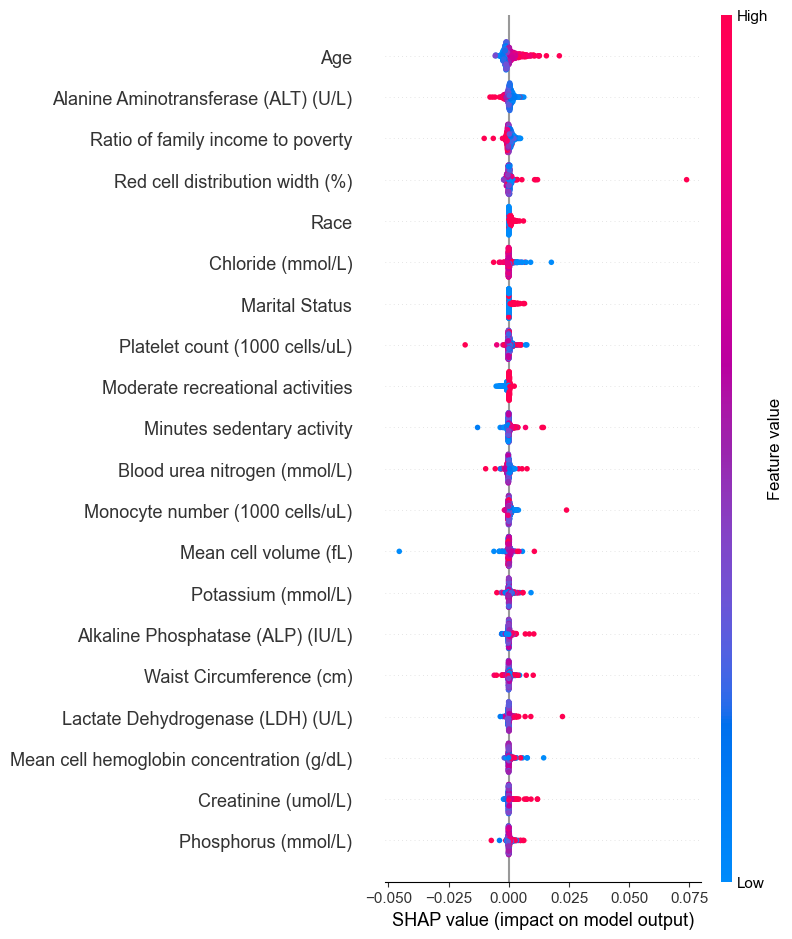

In [28]:
import numpy as np
feature_group = {
    "Doctor told you have diabetes": ["Doctor told you have diabetes_2", "Doctor told you have diabetes_3"],
    "Education Level - Adults 20+": ["Education Level - Adults 20+_2", "Education Level - Adults 20+_3", "Education Level - Adults 20+_4", "Education Level - Adults 20+_5"],
    "Ever told you had a stroke": ["Ever told you had a stroke_2"],
    "Ever told you had coronary heart disease": ["Ever told you had coronary heart disease_2"],
    "Ever told you had high blood pressure": ["Ever told you had high blood pressure_2"],
    "Had at least 12 alcohol drinks/1 yr?": ["Had at least 12 alcohol drinks/1 yr?_2"],
    "Marital Status": ["Marital Status_2", "Marital Status_3", "Marital Status_4", "Marital Status_5", "Marital Status_6"],
    "Moderate recreational activities": ["Moderate recreational activities_2"],
    "Moderate work activity": ["Moderate work activity_2"],
    "Race": ["Race_2", "Race_3", "Race_4", "Race_5"],
    "Smoked at least 100 cigarettes in life": ["Smoked at least 100 cigarettes in life_2"],
    "Vigorous recreational activities": ["Vigorous recreational activities_2"],
    "Vigorous work activity": ["Vigorous work activity_2"],
    "Walk or bicycle": ["Walk or bicycle_2"],
    "Age": ["Age"], 
    "Minutes sedentary activity": ["Minutes sedentary activity"], 
    "Ratio of family income to poverty": ["Ratio of family income to poverty"],
    "Waist Circumference (cm)": ["Waist Circumference (cm)"],
    "Alanine Aminotransferase (ALT) (U/L)": ["Alanine Aminotransferase (ALT) (U/L)"],
    "Albumin (g/L)": ["Albumin (g/L)"],
    "Albumin_urine (mg/L)": ["Albumin_urine (mg/L)"], 
    "Alkaline Phosphatase (ALP) (IU/L)": ["Alkaline Phosphatase (ALP) (IU/L)"],
    "Bicarbonate (mmol/L)": ["Bicarbonate (mmol/L)"],
    "Blood urea nitrogen (mmol/L)": ["Blood urea nitrogen (mmol/L)"],
    "Chloride (mmol/L)": ["Chloride (mmol/L)"],
    "Cholesterol (mmol/L)": ["Cholesterol (mmol/L)"],
    "Creatinine (umol/L)": ["Creatinine (?mol/L)"],
    "Creatinine_urine (umol/L)": ["Creatinine_urine (umol/L)"],
    "Direct HDL-Cholesterol (mmol/L)": ["Direct HDL-Cholesterol (mmol/L)"],
    "Gamma Glutamyl Transferase (GGT) (U/L)": ["Gamma Glutamyl Transferase (GGT) (U/L)"],
    "Globulin (g/L)": ["Globulin (g/L)"],
    "Glucose_serum (mmol/L)": ["Glucose_serum (mmol/L)"],
    "Glycohemoglobin (%)": ["Glycohemoglobin (%)"],
    "Hematocrit (%)": ["Hematocrit (%)"],
    "Hemoglobin (g/dL)": ["Hemoglobin (g/dL)"],
    "Iron_refigerated (umol/L)": ["Iron_refigerated (umol/L)"],
    "Lactate Dehydrogenase (LDH) (U/L)": ["Lactate Dehydrogenase (LDH) (U/L)"],
    "Lymphocyte number (1000 cells/uL)": ["Lymphocyte number (1000 cells/uL)"],
    "Lymphocyte percent (%)": ["Lymphocyte percent (%)"],
    "Mean cell hemoglobin (pg)": ["Mean cell hemoglobin (pg)"],
    "Mean cell hemoglobin concentration (g/dL)": ["Mean cell hemoglobin concentration (g/dL)"],
    "Mean cell volume (fL)": ["Mean cell volume (fL)"],
    "Monocyte number (1000 cells/uL)": ["Monocyte number (1000 cells/uL)"],
    "Monocyte percent (%)": ["Monocyte percent (%)"],
    "Osmolality (mmol/Kg)": ["Osmolality (mmol/Kg)"],
    "Phosphorus (mmol/L)": ["Phosphorus (mmol/L)"],
    "Platelet count (1000 cells/uL)": ["Platelet count (1000 cells/uL)"],
    "Potassium (mmol/L)": ["Potassium (mmol/L)"],
    "Red blood cell count (million cells/uL)": ["Red blood cell count (million cells/uL)"],
    "Red cell distribution width (%)": ["Red cell distribution width (%)"],
    "Segmented neutrophils num (1000 cell/uL)": ["Segmented neutrophils num (1000 cell/uL)"],
    "Segmented neutrophils percent (%)": ["Segmented neutrophils percent (%)"],
    "Total protein (g/L)": ["Total protein (g/L)"],
    "Uric acid (umol/L)": ["Uric acid (umol/L)"]
}
aggregated_features = pd.DataFrame(index=x_test_new.index)
for new_feature_name, original_columns in feature_group.items():
    existing_columns = [col for col in original_columns if col in x_test_new.columns]
    if existing_columns:
        aggregated_features[new_feature_name] = x_test_new[existing_columns].max(axis=1)
    else:
        print(f"Warning: None of the columns in {original_columns} were found in x_test_new")
if isinstance(shap_values, list):
    shap_values = np.array(shap_values[1])
num_samples = shap_values.shape[0]
aggregated_shap_values = np.zeros((num_samples, len(feature_group)))
for i, (new_feature_name, original_columns) in enumerate(feature_group.items()):
    group_indices = [x_test_new.columns.get_loc(col) for col in original_columns if col in x_test_new.columns]
    if group_indices:
        aggregated_shap_values[:, i] = np.max(shap_values[:, group_indices], axis=1)
feature_names = list(feature_group.keys())
fig1 = plt.figure()
shap.summary_plot(aggregated_shap_values, features=aggregated_features, feature_names=feature_names)

In [29]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('SVM-SHAP图-3年心因死亡.pdf') as pdf:
    pdf.savefig(fig1)
    plt.close()

In [30]:
shap_values_mean_abs = np.mean(np.abs(aggregated_shap_values), axis=0)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': shap_values_mean_abs
})
features = feature_importance.sort_values(by='Importance', ascending=False)
print("All features based on SHAP values:")
print(features)

All features based on SHAP values:
                                      Feature  Importance
14                                        Age    0.002035
18       Alanine Aminotransferase (ALT) (U/L)    0.000913
16          Ratio of family income to poverty    0.000780
49            Red cell distribution width (%)    0.000734
9                                        Race    0.000704
24                          Chloride (mmol/L)    0.000574
6                              Marital Status    0.000571
46             Platelet count (1000 cells/uL)    0.000567
7            Moderate recreational activities    0.000562
15                 Minutes sedentary activity    0.000554
23               Blood urea nitrogen (mmol/L)    0.000541
42            Monocyte number (1000 cells/uL)    0.000516
41                      Mean cell volume (fL)    0.000486
47                         Potassium (mmol/L)    0.000486
21          Alkaline Phosphatase (ALP) (IU/L)    0.000474
17                   Waist Circumfere

In [31]:
features.to_excel("SVM-SHAP值-3年心因死亡.xlsx", index=False)

In [18]:
import pandas as pd
df1 = pd.read_csv(r"D:\临床数据\NHANES数据清洗\3年心因死亡数据.csv", low_memory=False)
selected_columns = [
    "SEQN","Doctor told you have diabetes", "Education Level - Adults 20+", "Ever told you had a stroke",
    "Ever told you had coronary heart disease", "Ever told you had high blood pressure",
    "Had at least 12 alcohol drinks/1 yr?", "Marital Status", "Moderate recreational activities",
    "Moderate work activity", "Race", "Smoked at least 100 cigarettes in life", 
    "Vigorous recreational activities", "Vigorous work activity", "Walk or bicycle", "Age", 
    "Minutes sedentary activity", "Ratio of family income to poverty", "Waist Circumference (cm)", 
    "Alanine Aminotransferase (ALT) (U/L)", "Albumin (g/L)", "Albumin_urine (mg/L)", 
    "Alkaline Phosphatase (ALP) (IU/L)", "Bicarbonate (mmol/L)", "Blood urea nitrogen (mmol/L)", 
    "Chloride (mmol/L)", "Cholesterol (mmol/L)", "Creatinine (?mol/L)", "Creatinine_urine (umol/L)", 
    "Direct HDL-Cholesterol (mmol/L)", "Gamma Glutamyl Transferase (GGT) (U/L)", "Globulin (g/L)", 
    "Glucose_serum (mmol/L)", "Glycohemoglobin (%)", "Hematocrit (%)", "Hemoglobin (g/dL)", 
    "Iron_refigerated (umol/L)", "Lactate Dehydrogenase (LDH) (U/L)", "Lymphocyte number (1000 cells/uL)", 
    "Lymphocyte percent (%)", "Mean cell hemoglobin (pg)", "Mean cell hemoglobin concentration (g/dL)", 
    "Mean cell volume (fL)", "Monocyte number (1000 cells/uL)", "Monocyte percent (%)", 
    "Osmolality (mmol/Kg)", "Phosphorus (mmol/L)", "Platelet count (1000 cells/uL)", 
    "Potassium (mmol/L)", "Red blood cell count (million cells/uL)", "Red cell distribution width (%)", 
    "Segmented neutrophils num (1000 cell/uL)", "Segmented neutrophils percent (%)", 
    "Total protein (g/L)", "Uric acid (umol/L)", "3 year heart death"
]
df2 = df1[selected_columns]
from sklearn.preprocessing import StandardScaler
first_col = df2.iloc[:, 0]
last_col = df2.iloc[:, -1]
for col in df2.columns[1:15]:
    df2[col] = df2[col].astype('category')
df_encoded = pd.get_dummies(df2.iloc[:, 1:15], drop_first=True)
df_encoded = df_encoded.astype(int)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df2.iloc[:, 15:-1]), columns=df2.columns[15:-1])
df3 = pd.concat([first_col, df_encoded, df_standardized, last_col], axis=1)
x = df3.iloc[:, 1:66]
y = df3['3 year heart death']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
import joblib
estimator = joblib.load('XGBoost-生活方式+检验学指标-3年心因死亡.joblib')
import shap
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
params = plt.rcParams
font_family = params['font.family']
font_name = params['font.sans-serif'][0]
print("当前字体设置：")
print("字体系列：", font_family)
print("字体名称：", font_name)
shap.initjs()
explainer = shap.Explainer(estimator)
shap_values = explainer.shap_values(x_test)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


当前字体设置：
字体系列： ['Arial']
字体名称： DejaVu Sans


[20:12:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


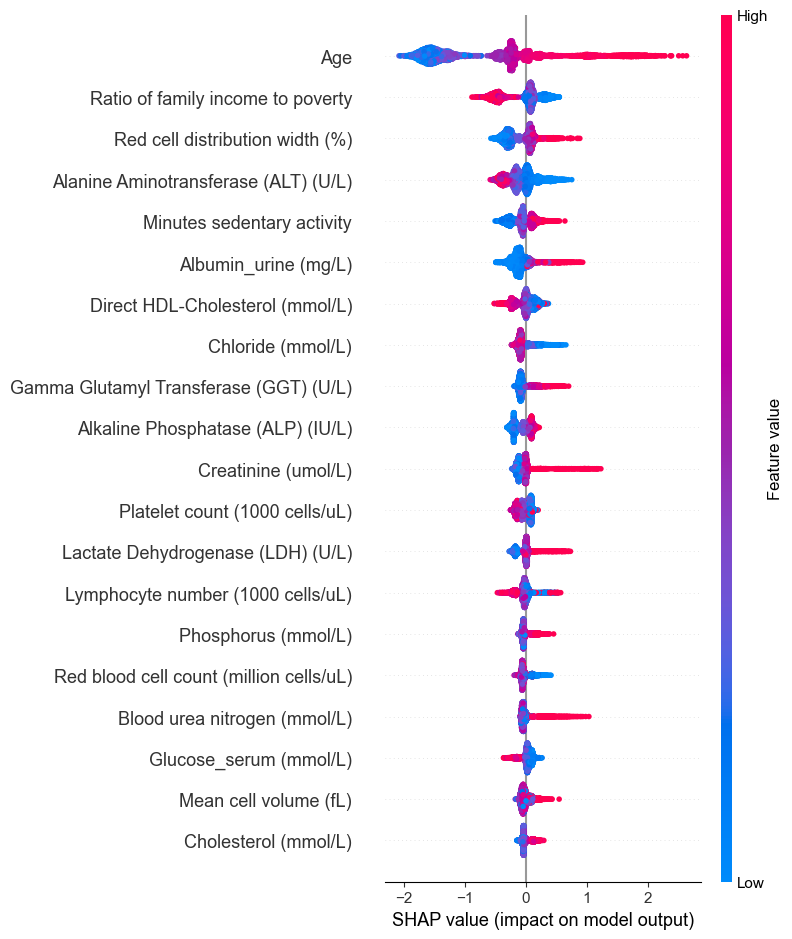

In [21]:
feature_group = {
    "Doctor told you have diabetes": ["Doctor told you have diabetes_2", "Doctor told you have diabetes_3"],
    "Education Level - Adults 20+": ["Education Level - Adults 20+_2", "Education Level - Adults 20+_3", "Education Level - Adults 20+_4", "Education Level - Adults 20+_5"],
    "Ever told you had a stroke": ["Ever told you had a stroke_2"],
    "Ever told you had coronary heart disease": ["Ever told you had coronary heart disease_2"],
    "Ever told you had high blood pressure": ["Ever told you had high blood pressure_2"],
    "Had at least 12 alcohol drinks/1 yr?": ["Had at least 12 alcohol drinks/1 yr?_2"],
    "Marital Status": ["Marital Status_2", "Marital Status_3", "Marital Status_4", "Marital Status_5", "Marital Status_6"],
    "Moderate recreational activities": ["Moderate recreational activities_2"],
    "Moderate work activity": ["Moderate work activity_2"],
    "Race": ["Race_2", "Race_3", "Race_4", "Race_5"],
    "Smoked at least 100 cigarettes in life": ["Smoked at least 100 cigarettes in life_2"],
    "Vigorous recreational activities": ["Vigorous recreational activities_2"],
    "Vigorous work activity": ["Vigorous work activity_2"],
    "Walk or bicycle": ["Walk or bicycle_2"],
    "Age": ["Age"], 
    "Minutes sedentary activity": ["Minutes sedentary activity"], 
    "Ratio of family income to poverty": ["Ratio of family income to poverty"],
    "Waist Circumference (cm)": ["Waist Circumference (cm)"],
    "Alanine Aminotransferase (ALT) (U/L)": ["Alanine Aminotransferase (ALT) (U/L)"],
    "Albumin (g/L)": ["Albumin (g/L)"],
    "Albumin_urine (mg/L)": ["Albumin_urine (mg/L)"], 
    "Alkaline Phosphatase (ALP) (IU/L)": ["Alkaline Phosphatase (ALP) (IU/L)"],
    "Bicarbonate (mmol/L)": ["Bicarbonate (mmol/L)"],
    "Blood urea nitrogen (mmol/L)": ["Blood urea nitrogen (mmol/L)"],
    "Chloride (mmol/L)": ["Chloride (mmol/L)"],
    "Cholesterol (mmol/L)": ["Cholesterol (mmol/L)"],
    "Creatinine (umol/L)": ["Creatinine (?mol/L)"],
    "Creatinine_urine (umol/L)": ["Creatinine_urine (umol/L)"],
    "Direct HDL-Cholesterol (mmol/L)": ["Direct HDL-Cholesterol (mmol/L)"],
    "Gamma Glutamyl Transferase (GGT) (U/L)": ["Gamma Glutamyl Transferase (GGT) (U/L)"],
    "Globulin (g/L)": ["Globulin (g/L)"],
    "Glucose_serum (mmol/L)": ["Glucose_serum (mmol/L)"],
    "Glycohemoglobin (%)": ["Glycohemoglobin (%)"],
    "Hematocrit (%)": ["Hematocrit (%)"],
    "Hemoglobin (g/dL)": ["Hemoglobin (g/dL)"],
    "Iron_refigerated (umol/L)": ["Iron_refigerated (umol/L)"],
    "Lactate Dehydrogenase (LDH) (U/L)": ["Lactate Dehydrogenase (LDH) (U/L)"],
    "Lymphocyte number (1000 cells/uL)": ["Lymphocyte number (1000 cells/uL)"],
    "Lymphocyte percent (%)": ["Lymphocyte percent (%)"],
    "Mean cell hemoglobin (pg)": ["Mean cell hemoglobin (pg)"],
    "Mean cell hemoglobin concentration (g/dL)": ["Mean cell hemoglobin concentration (g/dL)"],
    "Mean cell volume (fL)": ["Mean cell volume (fL)"],
    "Monocyte number (1000 cells/uL)": ["Monocyte number (1000 cells/uL)"],
    "Monocyte percent (%)": ["Monocyte percent (%)"],
    "Osmolality (mmol/Kg)": ["Osmolality (mmol/Kg)"],
    "Phosphorus (mmol/L)": ["Phosphorus (mmol/L)"],
    "Platelet count (1000 cells/uL)": ["Platelet count (1000 cells/uL)"],
    "Potassium (mmol/L)": ["Potassium (mmol/L)"],
    "Red blood cell count (million cells/uL)": ["Red blood cell count (million cells/uL)"],
    "Red cell distribution width (%)": ["Red cell distribution width (%)"],
    "Segmented neutrophils num (1000 cell/uL)": ["Segmented neutrophils num (1000 cell/uL)"],
    "Segmented neutrophils percent (%)": ["Segmented neutrophils percent (%)"],
    "Total protein (g/L)": ["Total protein (g/L)"],
    "Uric acid (umol/L)": ["Uric acid (umol/L)"]
}
aggregated_features = pd.DataFrame(index=x_test.index)
for new_feature_name, original_columns in feature_group.items():
    existing_columns = [col for col in original_columns if col in x_test.columns]
    if existing_columns:
        aggregated_features[new_feature_name] = x_test[existing_columns].max(axis=1)
    else:
        print(f"Warning: None of the columns in {original_columns} were found in x_test")
num_samples = shap_values.shape[0]
aggregated_shap_values = np.zeros((num_samples, len(feature_group)))
for i, (new_feature_name, original_columns) in enumerate(feature_group.items()):
    group_indices = [x_test.columns.get_loc(col) for col in original_columns if col in x_test.columns]
    if group_indices:
        aggregated_shap_values[:, i] = np.max(shap_values[:, group_indices], axis=1)
feature_names = list(feature_group.keys())
fig1 = plt.figure()
shap.summary_plot(aggregated_shap_values, features=aggregated_features, feature_names=feature_names)

In [22]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('XGBoost-SHAP图-3年心因死亡.pdf') as pdf:
    pdf.savefig(fig1)
    plt.close()

In [23]:
shap_values_mean_abs = np.mean(np.abs(aggregated_shap_values), axis=0)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': shap_values_mean_abs
})
features = feature_importance.sort_values(by='Importance', ascending=False)
print("All features based on SHAP values:")
print(features)

All features based on SHAP values:
                                      Feature  Importance
14                                        Age    0.964896
16          Ratio of family income to poverty    0.262005
49            Red cell distribution width (%)    0.203083
18       Alanine Aminotransferase (ALT) (U/L)    0.181727
15                 Minutes sedentary activity    0.152681
20                       Albumin_urine (mg/L)    0.148844
28            Direct HDL-Cholesterol (mmol/L)    0.114944
24                          Chloride (mmol/L)    0.111116
29     Gamma Glutamyl Transferase (GGT) (U/L)    0.108389
21          Alkaline Phosphatase (ALP) (IU/L)    0.107553
26                        Creatinine (umol/L)    0.091189
46             Platelet count (1000 cells/uL)    0.088854
36          Lactate Dehydrogenase (LDH) (U/L)    0.078310
37          Lymphocyte number (1000 cells/uL)    0.069354
45                        Phosphorus (mmol/L)    0.063947
48    Red blood cell count (million c

In [24]:
features.to_excel("XGBoost-SHAP值-3年心因死亡.xlsx", index=False)